In [65]:
# import all the necessary modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# import the required dataset
df=pd.read_csv('/kaggle/input/twitter-data/twitter_training.csv')

In [67]:
df.head(10)

,Tweet_ID,entity,sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [68]:
df.tail(10)

,Tweet_ID,entity,sentiment,Tweet_content
74672,9199,Nvidia,Positive,Let no elite go unnoticed... NVIDIA Highlights...
74673,9199,Nvidia,Positive,Let no elim go unnoticed.... NVIDIA Highlights...
74674,9199,Nvidia,Positive,Let a no information elim that go unnoticed......
74675,9199,Nvidia,Positive,<unk> my elim be no.... NVIDIA Highlights Pict...
74676,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


The above dataset consists of a total of 74682 entries with four different columns with the 'Tweet_ID' being a int datatype and remaining three columns are of object datatype.

In [70]:
df.describe()

,Tweet_ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


There are a total of 13200 unique tweet id's.

In [71]:
df.isnull().sum()

Tweet_ID           0
entity             0
sentiment          0
Tweet_content    686
dtype: int64

There a total of 686 empty tweets are available in the given dataset.

<Axes: >

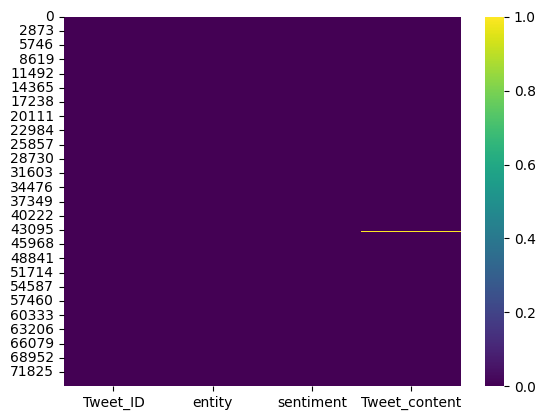

In [72]:
sns.heatmap(df.isnull(),cmap='viridis')

In [73]:
df.values

array([[2401, 'Borderlands', 'Positive',
        'im getting on borderlands and i will murder you all ,'],
       [2401, 'Borderlands', 'Positive',
        'I am coming to the borders and I will kill you all,'],
       [2401, 'Borderlands', 'Positive',
        'im getting on borderlands and i will kill you all,'],
       ...,
       [9200, 'Nvidia', 'Positive',
        'Just realized the windows partition of my Mac is now 6 years behind on Nvidia drivers and I have no idea how he didn’t notice'],
       [9200, 'Nvidia', 'Positive',
        'Just realized between the windows partition of my Mac is like being 6 years behind on Nvidia drivers and cars I have no fucking idea how I ever didn ’ t notice'],
       [9200, 'Nvidia', 'Positive',
        'Just like the windows partition of my Mac is like 6 years behind on its drivers So you have no idea how I didn’t notice']],
      dtype=object)

In [74]:
df.value_counts

<bound method DataFrame.value_counts of        Tweet_ID       entity sentiment  \
0          2401  Borderlands  Positive   
1          2401  Borderlands  Positive   
2          2401  Borderlands  Positive   
3          2401  Borderlands  Positive   
4          2401  Borderlands  Positive   
...         ...          ...       ...   
74677      9200       Nvidia  Positive   
74678      9200       Nvidia  Positive   
74679      9200       Nvidia  Positive   
74680      9200       Nvidia  Positive   
74681      9200       Nvidia  Positive   

                                           Tweet_content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows part

In [75]:
df.nunique()

Tweet_ID         12447
entity              32
sentiment            4
Tweet_content    69488
dtype: int64

These are the no of unique values present in the given dataset where the entity has 32 unique values and sentiment has 4 unique values.

In [76]:
df['entity'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

These are the 32 different type of unique entity values where the tweets were based on and the content of tweets are based on these topics.

In [77]:
df['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

These are the four different types of unique sentiment values and it describes how these tweets were actually processed by the audience and how they eventually responded for these tweets.

1. Analysis of number of tweets that were based on specific sentiment type

Text(0.5, 1.0, 'Analysis of variation between Number of tweets and Sentiment type')

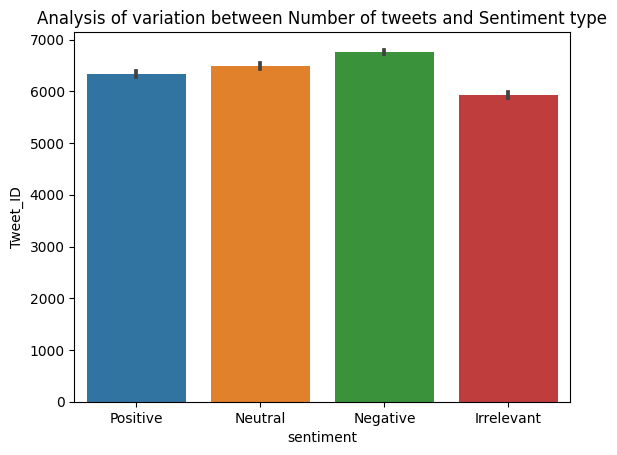

In [78]:
sns.barplot(x='sentiment',y='Tweet_ID',data=df)
plt.title('Analysis of variation between Number of tweets and Sentiment type')

From the above plot it is clear that there is an equal percentage of sentiment type associated with each tweet_id among which the users are highly inclined to negative tweets and lossely inclined to irrelavant tweets when compared among these four sentiment types.

2. Analysis of number of tweets that were associated with the each differnt type of entity content

[Text(0, 0, 'Borderlands'),
 Text(1, 0, 'CallOfDutyBlackopsColdWar'),
 Text(2, 0, 'Amazon'),
 Text(3, 0, 'Overwatch'),
 Text(4, 0, 'Xbox(Xseries)'),
 Text(5, 0, 'NBA2K'),
 Text(6, 0, 'Dota2'),
 Text(7, 0, 'PlayStation5(PS5)'),
 Text(8, 0, 'WorldOfCraft'),
 Text(9, 0, 'CS-GO'),
 Text(10, 0, 'Google'),
 Text(11, 0, 'AssassinsCreed'),
 Text(12, 0, 'ApexLegends'),
 Text(13, 0, 'LeagueOfLegends'),
 Text(14, 0, 'Fortnite'),
 Text(15, 0, 'Microsoft'),
 Text(16, 0, 'Hearthstone'),
 Text(17, 0, 'Battlefield'),
 Text(18, 0, 'PlayerUnknownsBattlegrounds(PUBG)'),
 Text(19, 0, 'Verizon'),
 Text(20, 0, 'HomeDepot'),
 Text(21, 0, 'FIFA'),
 Text(22, 0, 'RedDeadRedemption(RDR)'),
 Text(23, 0, 'CallOfDuty'),
 Text(24, 0, 'TomClancysRainbowSix'),
 Text(25, 0, 'Facebook'),
 Text(26, 0, 'GrandTheftAuto(GTA)'),
 Text(27, 0, 'MaddenNFL'),
 Text(28, 0, 'johnson&johnson'),
 Text(29, 0, 'Cyberpunk2077'),
 Text(30, 0, 'TomClancysGhostRecon'),
 Text(31, 0, 'Nvidia')]

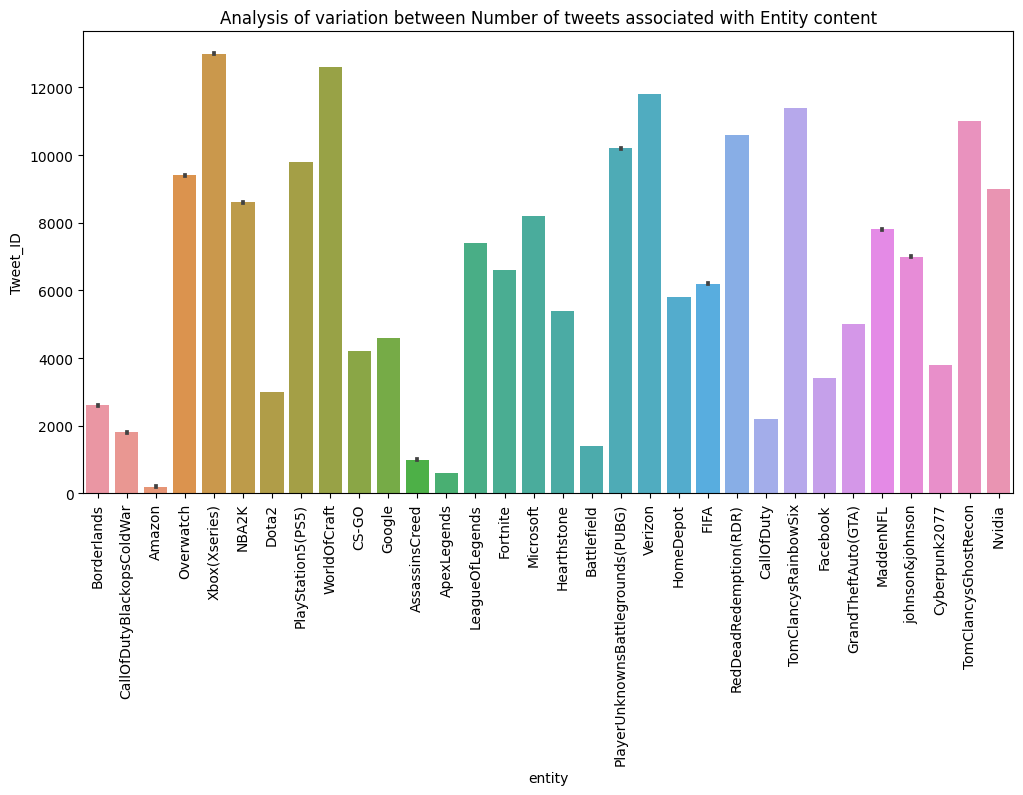

In [79]:
fig,ax=plt.subplots(figsize=(12,6))
plt.title('Analysis of variation between Number of tweets associated with Entity content')
sns.barplot(x='entity',y='Tweet_ID',data=df,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

From the above plot it is clear that among all the differnt types of entity content based tweets 
1.Tweets on Xbox are highest
2.Worldofcraft,Pubg,TomClancysRainbowSix,RDR are the entity types which are having a great competition among the median tweets.
3.Amazon and ApexLegends are the entity content types were there are relatively very low number of tweets.
4.BorderLands,CallofDuty,Amazon,Overwatch,Xbox,NBA2K,Assassin's creed,Pubg,Fifa,Madden NFL and jhonson & jhonson are the entities which are having outliers in the content data provided.

3. Finding the most and least repititive tweet_id to know the behaviour of the tweet_id and their association and relation with the sentiment and entity variables.

In [80]:
# from sklearn.cluster import KMeans

# # Assuming df is your DataFrame with a column named 'id_numbers'
# # Replace 'your_column_name' with the actual column name in your DataFrame
# id_numbers = df['Tweet_ID'].values.reshape(-1, 1)

# # Choose the number of clusters (k) - you can experiment with different values
# k = 2
# kmeans = KMeans(n_clusters=k, random_state=42)
# df['cluster'] = kmeans.fit_predict(id_numbers)

# # Now, check the clusters to identify the most and least repetitive ID numbers
# most_repetitive_id = df.groupby('cluster')['Tweet_ID'].mean().idxmax()
# least_repetitive_id = df.groupby('cluster')['Tweet_ID'].mean().idxmin()

# print(f"Most Repetitive ID: {most_repetitive_id}")
# print(f"Least Repetitive ID: {least_repetitive_id}")

newdf=df['Tweet_ID']
newdf.head() 
maxrep=newdf.value_counts().idxmax()
print(maxrep)
minrep=newdf.value_counts().idxmin()
print(minrep)

2401
2401


The above procedure is not correct, not bale to get desired the results.XXXXXXXXXX

4. Analysis of entity content with sentiment type that can able to make a description of existence of relation between the entity content and how it varies among various snetiment type

[Text(0, 0, 'Borderlands'),
 Text(1, 0, 'CallOfDutyBlackopsColdWar'),
 Text(2, 0, 'Amazon'),
 Text(3, 0, 'Overwatch'),
 Text(4, 0, 'Xbox(Xseries)'),
 Text(5, 0, 'NBA2K'),
 Text(6, 0, 'Dota2'),
 Text(7, 0, 'PlayStation5(PS5)'),
 Text(8, 0, 'WorldOfCraft'),
 Text(9, 0, 'CS-GO'),
 Text(10, 0, 'Google'),
 Text(11, 0, 'AssassinsCreed'),
 Text(12, 0, 'ApexLegends'),
 Text(13, 0, 'LeagueOfLegends'),
 Text(14, 0, 'Fortnite'),
 Text(15, 0, 'Microsoft'),
 Text(16, 0, 'Hearthstone'),
 Text(17, 0, 'Battlefield'),
 Text(18, 0, 'PlayerUnknownsBattlegrounds(PUBG)'),
 Text(19, 0, 'Verizon'),
 Text(20, 0, 'HomeDepot'),
 Text(21, 0, 'FIFA'),
 Text(22, 0, 'RedDeadRedemption(RDR)'),
 Text(23, 0, 'CallOfDuty'),
 Text(24, 0, 'TomClancysRainbowSix'),
 Text(25, 0, 'Facebook'),
 Text(26, 0, 'GrandTheftAuto(GTA)'),
 Text(27, 0, 'MaddenNFL'),
 Text(28, 0, 'johnson&johnson'),
 Text(29, 0, 'Cyberpunk2077'),
 Text(30, 0, 'TomClancysGhostRecon'),
 Text(31, 0, 'Nvidia')]

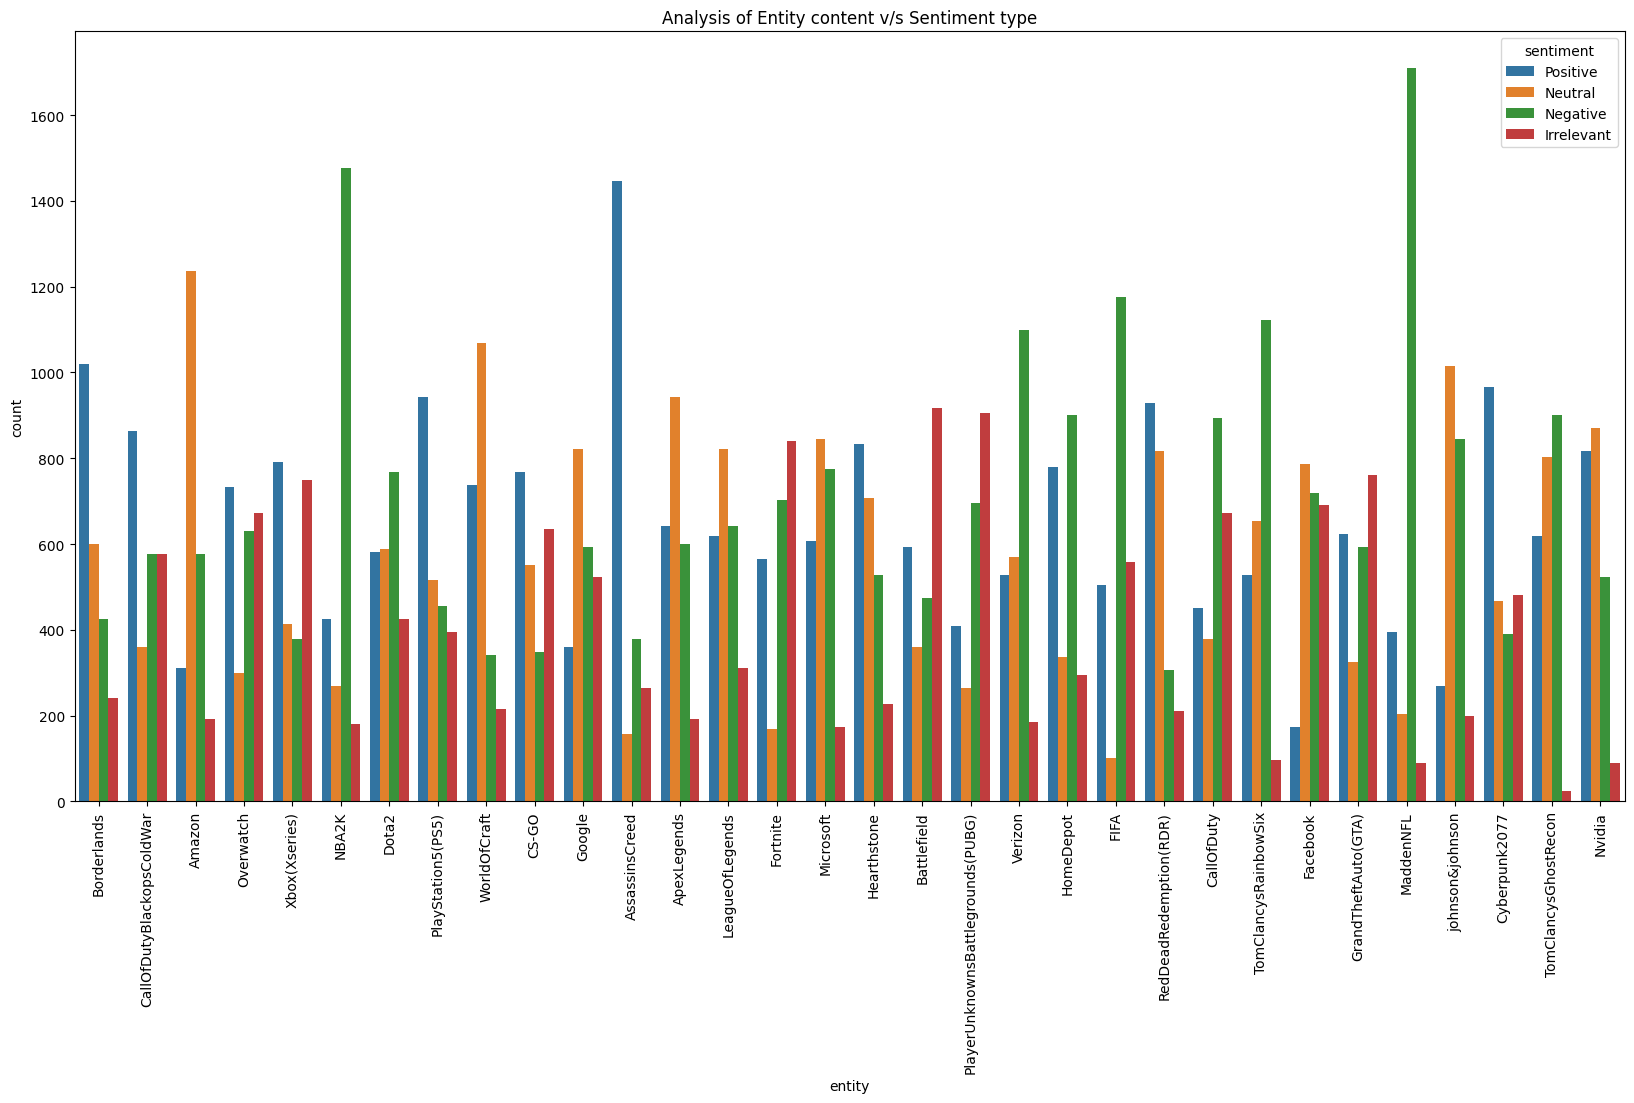

In [81]:
fig,ax=plt.subplots(figsize=(20,10))
plt.title('Analysis of Entity content v/s Sentiment type')
sns.countplot(x='entity',hue='sentiment',data=df,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

From the above plot we can conclude that:
1.Positive content tweets are available highly in Borderlands,PS5,Assassins Creed,RDR and Cyber Punk
2.Most negative content tweets are from NBA2K,Verizon,FifaTomClancysRainbowSix,Madden NFL 

Now we need to remove the quotes.

In [82]:
df.iloc[:,3]=df.iloc[:,3].replace('"','')

In [83]:
df.head()

,Tweet_ID,entity,sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


Handling the missing values from the Tweet_content column variable

In [84]:
df=df.dropna(subset=['Tweet_content'])

([<matplotlib.patches.Wedge at 0x7a5c84726d10>,
 [Text(0.9397125449429853, 0.5717869645915147, 'Positive'),
  Text(-0.4998306282508549, 0.9798823108222516, 'Neutral'),
  Text(-0.8959514158051299, -0.6381779223044177, 'Negative'),
  Text(0.7034625514597657, -0.845659765327473, 'Irrelevant')],
 [Text(0.5125704790598101, 0.3118837988680989, '17.4%'),
  Text(-0.2726348881368299, 0.5344812604485009, '30.2%'),
  Text(-0.48870077225734354, -0.3480970485296823, '24.5%'),
  Text(0.3837068462507813, -0.46126896290589425, '27.9%')])

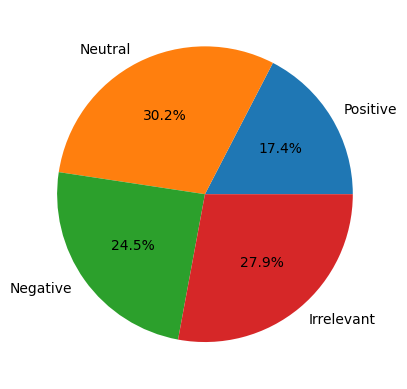

In [85]:
sentiment_count=df.groupby('sentiment').count()
sentiment_labels=df['sentiment'].unique()
plt.pie(sentiment_count['Tweet_ID'],labels=sentiment_labels,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7a5c8456e830>,
 [Text(1.0948684032521923, 0.10612812803397265, 'Borderlands'),
  Text(1.0530689037758008, 0.3178771522151811, 'CallOfDutyBlackopsColdWar'),
  Text(0.9716474273409434, 0.5156561615473301, 'Amazon'),
  Text(0.8545803032582614, 0.6925983722786375, 'Overwatch'),
  Text(0.7040726795500734, 0.8451518573080108, 'Xbox(Xseries)'),
  Text(0.5281536430873391, 0.964911254620637, 'NBA2K'),
  Text(0.3281895701622058, 1.0499007600896129, 'Dota2'),
  Text(0.11268043834775995, 1.0942134704040876, 'PlayStation5(PS5)'),
  Text(-0.10203678888025981, 1.0952572728427807, 'WorldOfCraft'),
  Text(-0.3135824183815083, 1.0543557591638626, 'CS-GO'),
  Text(-0.51565616154733, 0.9716474273409436, 'Google'),
  Text(-0.6975211936758655, 0.8505669781816103, 'AssassinsCreed'),
  Text(-0.849648205809449, 0.6986400549387247, 'ApexLegends'),
  Text(-0.9673673102645425, 0.523641563506512, 'LeagueOfLegends'),
  Text(-1.0501373654618278, 0.32743169312223214, 'Fortnite'),
  Te

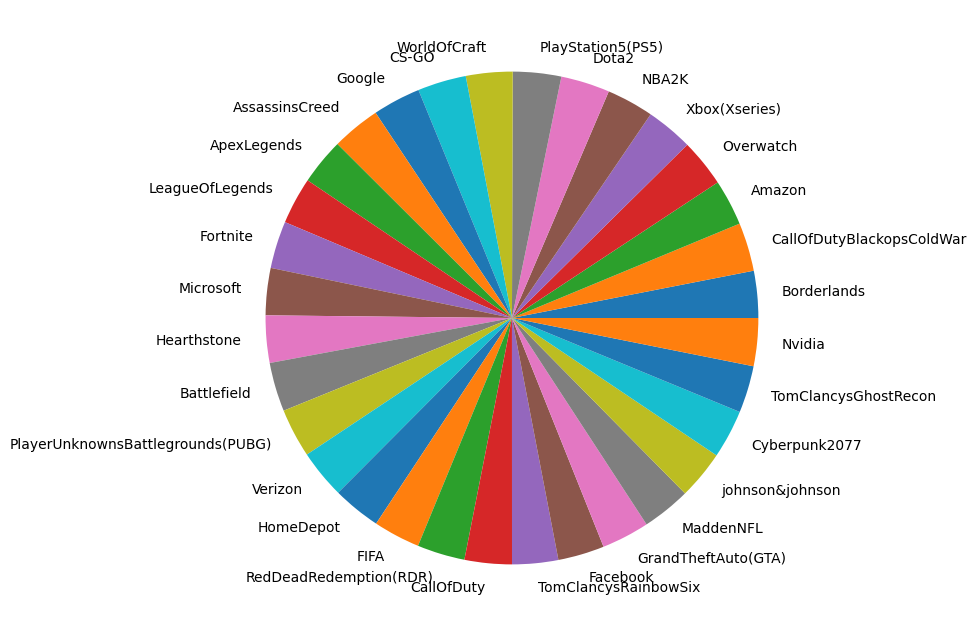

In [86]:
entity_count=df.groupby('entity').count()
entity_labels=df['entity'].unique()
plt.figure(figsize=(8,8))
plt.pie(entity_count['Tweet_ID'],labels=entity_labels)

Now here we will remove the tweet_id column as it is beneficial to do so while we try to implement NLP method.

In [87]:
df=df.drop('Tweet_ID',axis=1)

Applyting the Natural language processing (NLP) method

First we have to clean the training dataset before proceeding to NLP method.

In [89]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 73996):
  review = re.sub('[^a-zA-Z]', ' ', df.iloc[i,2])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1.Creating bag of words model

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X= cv.fit_transform(corpus).toarray()
Y=df.iloc[:,1]   

2.Encoding the target feature

In [91]:
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()
Y=model.fit_transform(Y)

3.Training and Testing split

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

4.Now training the set for Naive Bayes model

In [93]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=300,criterion='entropy',random_state=0)
classifier.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In this step we will use predict method based on the x testing data and then we will concatenate this result with the original dataset.

In [94]:
Y_pred = classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1 1]
 [1 1]
 [2 2]
 ...
 [3 3]
 [1 1]
 [1 3]]


In [95]:
print(Y_pred)

[1 1 2 ... 3 1 1]


Here we will use the metrics of classification in order to predict and analyse the accuracy of the implemented model with the help of details from confusion matrix.

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy=(accuracy_score(Y_test, Y_pred))*100
print(accuracy)     

[[3165  216  122  406]
 [  88 5941  172  443]
 [ 113  233 4596  477]
 [ 153  239  162 5673]]
87.2787062480292


We get an accuracy of 87.2 percent when we try to implement and predict the outcome of the given dataset using Random forest classifier and NLP methods.